In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns" , None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import random
import os
from tqdm import notebook
import gc
from string import punctuation
import chardet
import re
from datetime import datetime

from sklearn.pipeline import Pipeline , make_pipeline

np.random.seed(0)
random.seed(0)
pd.set_option("display.max_columns" , None)

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer , PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

In [2]:
#!ls '/content/drive/My Drive/LinkedIn/Outbound/Ajit_new/1.csv'

#Reading CSV

In [5]:
data = pd.read_csv("C:/Users/nikhi/OneDrive/Desktop/mbti_1.csv",encoding='utf-8') #this is my drive link so change it
final_data = pd.read_excel('C:/Users/nikhi/OneDrive/Desktop/New folder/6.xlsx',encoding='latin-1')

In [ ]:
data.isnull().sum()

In [7]:
final_data.isnull().sum()

Ultra_clean    0
dtype: int64

In [8]:
final_data = final_data.loc[:, ~final_data.columns.str.contains('^Unnamed')]

In [9]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ultra_clean  5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


#Checking and dropping Null values

In [10]:
final_data.dropna(inplace=True)
final_data.isnull().sum()

Ultra_clean    0
dtype: int64

In [ ]:
# a = "Ã¢â€¢Å¾Ã¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢Â about david Ã¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢Â¡studies thesisÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯david in may will get degree computer engineering roma treheÃ¢â‚¬â„¢s currently working his final thesis heÃ¢â‚¬â„¢s elaborating new information retrieval nlp techniques perform sentiment analysis brand monitoringwith work thesis david collaborating prof merialdo cybion srl a bigger project called Ã¢â‚¬Å“morningÃ¢â‚¬Âmost recent experiencesÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯from august september was san francisco participating the th Ã¢â‚¬Å“silicon valley study tourÃ¢â‚¬Â a winner the Ã¢â‚¬Å“innovation labÃ¢â‚¬Â competitiondavid took recently part a lot other business competition as nokia university program italia camp startup weekend Ã¢â‚¬Å“innovation campÃ¢â‚¬Â fullimmersion program it entrepreneurship an exnato base km romeworks progressÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯david now starting android programming heÃ¢â‚¬â„¢s working java programming his thesis enjoys discovering gamedeveloping worldin march learned program django python ormin february learned use Ã¢â‚¬Å“blueworksliveÃ¢â‚¬Â ibm platformlast works Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢â‚¬Â¢ python language learning with opengl computational geometry programmingÃ¢â‚¬Â¢ learning high performance computing studying parallel distributed algorithmsÃ¢â‚¬Â¢ development a web search engine focalized recipes using lucene javaÃ¢â‚¬Â¢ cryptography mobile security encryption techniques umtsÃ¢â€¢Å¾Ã¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢Â informatics skills Ã¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢Â¡programming languagesÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯c java phyton django sql basic android bash vb aspnet ocaml plasmxml rdf xquery xml schema xslt xhtmlcss jspoperative systemsÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯linux windows androiddata development management swÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯eclipse mysql weka visual studio microsoft sql server postgressql db office software suites photoshop"
# a

In [ ]:
# a.encode('utf-8').decode('ascii', 'ignore')

In [11]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [12]:
final_data.head()

,Ultra_clean
0,amy walters produced hundreds stories npr the ...
1,over seven years management leadership experie...
2,i a professional disruptor that a good thing l...
3,corporate recruiter since prior that agency rp...
4,currently recruiting tax advisory professional...


## **Removing rows with empty text**

In [13]:
indexNames = final_data[final_data['Ultra_clean'] == 'empty' ].index #do this 
indexNames

Int64Index([], dtype='int64')

In [14]:
final_data.drop(indexNames , inplace=True) #do this

## **Removing rows with blank value**

In [15]:
indexNames = final_data[final_data['Ultra_clean'] == ' ' ].index #do this 
indexNames

Int64Index([], dtype='int64')

In [16]:
final_data.drop(indexNames , inplace=True) #do this

In [17]:
df_temp = final_data
df_sum = pd.DataFrame(df_temp['Ultra_clean'],columns=['Ultra_clean']) #do this

In [18]:
df_sum.head()

,Ultra_clean
0,amy walters produced hundreds stories npr the ...
1,over seven years management leadership experie...
2,i a professional disruptor that a good thing l...
3,corporate recruiter since prior that agency rp...
4,currently recruiting tax advisory professional...


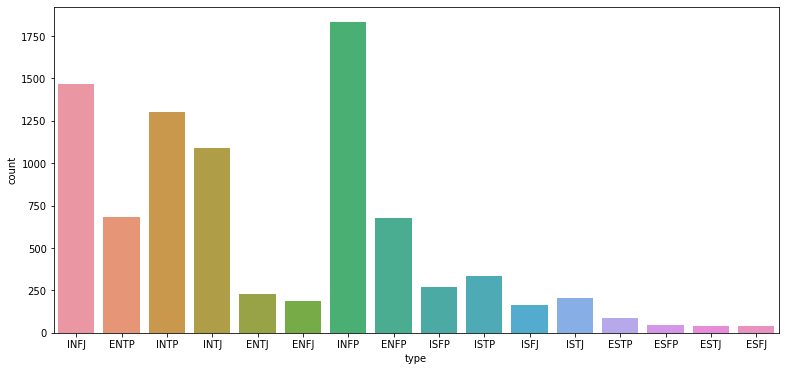

In [19]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x="type", data=data)

In [20]:
p1 = []
p2 = []
p3 = []
p4 = []

df_personality = pd.DataFrame()
for val in data['type']:
  p1.append(val.split()[0][0])
  p2.append(val.split()[0][1])
  p3.append(val.split()[0][2])
  p4.append(val.split()[0][3])

df_personality['Personality-1'] = p1
df_personality['Personality-2'] = p2
df_personality['Personality-3'] = p3
df_personality['Personality-4'] = p4

data = pd.concat([data,df_personality],axis=1)

In [21]:
data.head()

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


In [22]:
#Let's map them to their actual meaning to make more sense out of it
personality_map = {
    "I":"Introvert",
    "E":"Extrovert",
    "N":"Intuitive",
    "S":"Sensitive",
    "F":"Emotional",
    "T":"Thinker",
    "J":"Judgemental",
    "P":"Perceiving"
}

for col in data.loc[: , "Personality-1":"Personality-4"].columns:
    data[col] = data[col].map(personality_map)

In [23]:
data.head()

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introvert,Intuitive,Emotional,Judgemental
1,ENTP,'I'm finding the lack of me in these posts ver...,Extrovert,Intuitive,Thinker,Perceiving
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introvert,Intuitive,Thinker,Perceiving
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introvert,Intuitive,Thinker,Judgemental
4,ENTJ,'You're fired.|||That's another silly misconce...,Extrovert,Intuitive,Thinker,Judgemental


In [24]:
pip install googletrans

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 962kB 7.1MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=bce59ff3e4ebcbc5a27efb9505c1f1f2268a825a630beb29851d678a99675395
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=795348574959b4ea42a39db8a72085549f1b18f58bde2cf4003f65cdf7a98731
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [26]:
df_sum.head()

,Ultra_clean
0,amy walters produced hundreds stories npr the ...
1,over seven years management leadership experie...
2,i a professional disruptor that a good thing l...
3,corporate recruiter since prior that agency rp...
4,currently recruiting tax advisory professional...


In [27]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [28]:
pip install contractions

     |████████████████████████████████| 317kB 3.7MB/s 
     |████████████████████████████████| 245kB 7.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81697 sha256=d98825fbb52a8b2d6ffa2d711424a0e40dd85bec30cd04db827dd8f82de66be5
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [29]:
import contractions

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [30]:
data["clean-posts"] = data["posts"].apply(remove_URL)

In [31]:
data["clean-posts"] = data["clean-posts"].apply(replace_contractions)

Text Cleaning

In [32]:
import nltk
nltk.download("stopwords")

def clean_data(text,clean_stopwords=True,clean_puntuation=True,clean_numbers=True):
    text = text.lower()
    text = text.strip() #Leading and trailing whitespaces are removed
    text = text.strip("'") 
    text = text.strip()
    pattern = pattern = r"\|\|\|"
    f = lambda x : re.sub(pattern , " " , x)
    text = f(text)
    #Clean web links
    pattern = r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*"
    f = lambda x: re.sub(pattern , "" , x)
    text = f(text)

    if clean_stopwords == True:
        #Clean Stopwords
        stopword = r"|".join([f"\s{word}\s" for word in stopwords.words("english")])
        f = lambda x : re.sub(stopword, " " , x)
        text = f(text)
    if clean_puntuation == True:
        #Clean punctuations
        #Let's not remove apostrohspe "'' so our text can make more sense
        punctuations = punctuation.replace("'" , "")
        punctuations = f"[{punctuations}]"
        f = lambda x : re.sub(punctuations , "" , text)
        text = f(text)
    if clean_numbers == True:
        #Clean Numbers
        f = lambda x : re.sub(r"[0-9]+" , "" , x)
        text = f(text)
    
    # Join the characters again to form the string.
    text = ' '.join(text.split())
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
data["clean-posts"] = data["clean-posts"].apply(clean_data)

In [34]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = " ".join(x.split())

    except:
        pass
    return x

In [37]:
#remove non ascii characters
df_sum['Ultra_clean'] = [x.encode('utf-8').decode('ascii', 'ignore') for x in df_sum['Ultra_clean']]
data["Ultra_clean_post"] = [x.encode('utf-8').decode('ascii', 'ignore') for x in data["clean-posts"]]

In [38]:
data["clean-posts"] = data["clean-posts"].apply(remove_whitespace)
df_sum['Ultra_clean'] = df_sum['Ultra_clean'].apply(remove_whitespace)

In [39]:
data["length"] = data["Ultra_clean_post"].apply(len)
df_sum['Length'] = df_sum['Ultra_clean'].apply(len) #new part

Dropping the column with empty string

In [40]:
indexNames = data[data["length"] == 0 ].index #do this 
indexNames

Int64Index([3559], dtype='int64')

In [41]:
data.drop(indexNames , inplace=True) #do this

In [42]:
indexNames = df_sum[df_sum['Length'] ==0 ].index #do this 
indexNames

Int64Index([], dtype='int64')

In [43]:
df_sum.drop(indexNames , inplace=True) #do this

In [46]:
df_sum.head(43)

,Ultra_clean,Length
0,amy walters produced hundreds stories npr the ...,146
1,over seven years management leadership experie...,161
2,i a professional disruptor that a good thing l...,534
3,corporate recruiter since prior that agency rp...,181
4,currently recruiting tax advisory professional...,174
5,innovative customercentered marketing communit...,160
6,a top performing talent acquisition manager ex...,292
7,seasoned professional more eleven years experi...,485
8,qualificationscfp certified financial planner ...,314
9,wine cellar manageroversea account manager pro...,68


In [47]:
df_sum

,Ultra_clean,Length
0,amy walters produced hundreds stories npr the ...,146
1,over seven years management leadership experie...,161
2,i a professional disruptor that a good thing l...,534
3,corporate recruiter since prior that agency rp...,181
4,currently recruiting tax advisory professional...,174
...,...,...
4995,information systems leader deep management exp...,1650
4996,after starting the industry have worked a numb...,332
4997,producer director specialising factual televis...,658
4998,i experience vmware citrix virtual desktop inf...,516


In [48]:
data.head(5)

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4,clean-posts,Ultra_clean_post,length
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introvert,Intuitive,Emotional,Judgemental,and intj moments sportscenter top ten plays pr...,and intj moments sportscenter top ten plays pr...,2414
1,ENTP,'I'm finding the lack of me in these posts ver...,Extrovert,Intuitive,Thinker,Perceiving,i finding lack me these posts alarming sex be ...,i finding lack me these posts alarming sex be ...,4534
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introvert,Intuitive,Thinker,Perceiving,good one course which say know is blessing my ...,good one course which say know is blessing my ...,3564
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introvert,Intuitive,Thinker,Judgemental,dear intp enjoyed conversation other day esote...,dear intp enjoyed conversation other day esote...,4392
4,ENTJ,'You're fired.|||That's another silly misconce...,Extrovert,Intuitive,Thinker,Judgemental,you fired is another silly misconception appro...,you fired is another silly misconception appro...,4046


In [49]:
df_sum.head()

,Ultra_clean,Length
0,amy walters produced hundreds stories npr the ...,146
1,over seven years management leadership experie...,161
2,i a professional disruptor that a good thing l...,534
3,corporate recruiter since prior that agency rp...,181
4,currently recruiting tax advisory professional...,174


In [50]:
introverts_clean_text_corpus = " ".join([text for text in data["Ultra_clean_post"][data["Personality-1"] == "Introvert"]])
extroverts_clean_text_corpus = " ".join([text for text in data["Ultra_clean_post"][data["Personality-1"] == "Extrovert"]])
intutives_clean_text_corpus = " ".join([text for text in data["Ultra_clean_post"][data["Personality-2"] == "Intuitive"]])
sensitive_clean_text_corpus = " ".join([text for text in data["Ultra_clean_post"][data["Personality-2"] == "Sensitive"]])
emotional_clean_text_corpus = " ".join([text for text in data["Ultra_clean_post"][data["Personality-3"] == "Emotional"]])
thinkers_clean_text_corpus = " ".join([text for text in data["Ultra_clean_post"][data["Personality-3"] == "Thinker"]])
judgemental_clean_text_corpus = " ".join([text for text in data["Ultra_clean_post"][data["Personality-4"] == "Judgemental"]])
perceivers_clean_text_corpus = " ".join([text for text in data["Ultra_clean_post"][data["Personality-4"] == "Perceiving"]])

In [51]:
introverts_word_cloud = WordCloud(random_state=0).generate(introverts_clean_text_corpus)
extroverts_word_cloud = WordCloud(random_state=0).generate(extroverts_clean_text_corpus)
intuitives_word_cloud = WordCloud(random_state=0).generate(intutives_clean_text_corpus)
sensitive_word_cloud = WordCloud(random_state=0).generate(sensitive_clean_text_corpus)
judgemental_word_cloud = WordCloud(random_state=0).generate(judgemental_clean_text_corpus)
perceivers_word_cloud = WordCloud(random_state=0).generate(perceivers_clean_text_corpus)

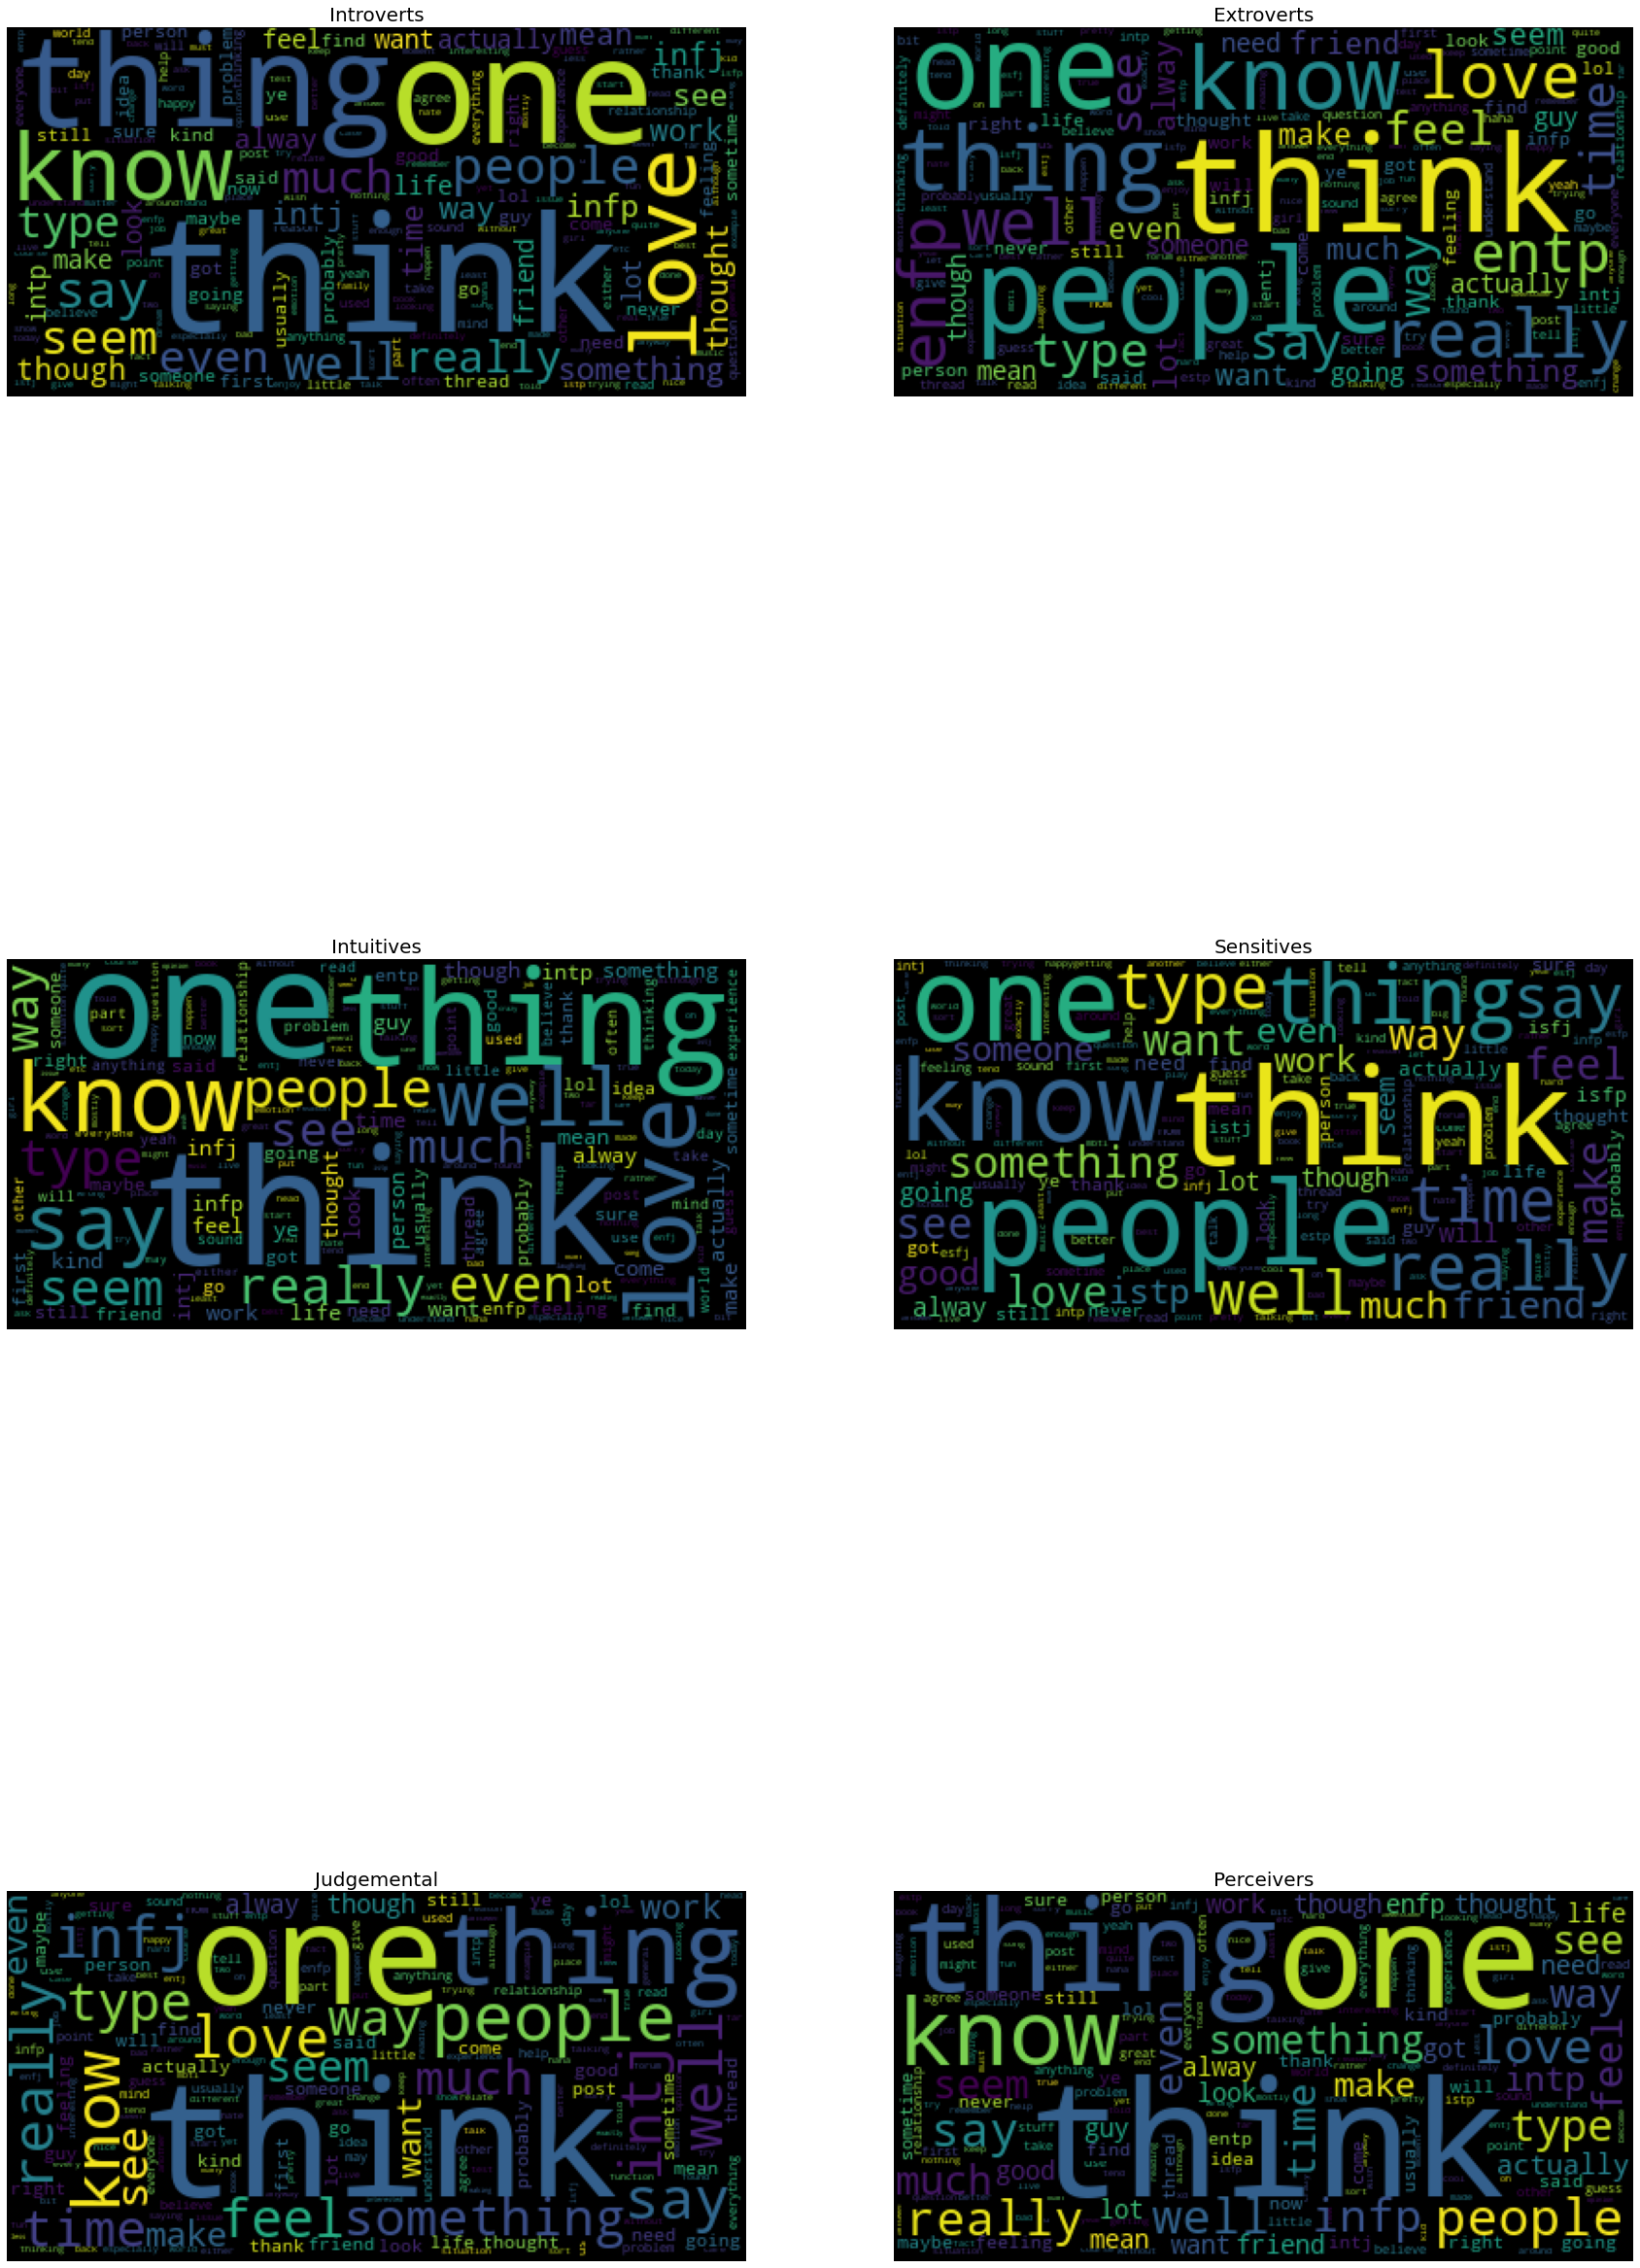

In [52]:
fig , ax = plt.subplots(3,2,figsize=(30,50))
ax = ax.flatten()

ax[0].imshow(introverts_word_cloud)
ax[0].set_title("Introverts" , fontsize = 20)
ax[0].axis(False)

ax[1].imshow(extroverts_word_cloud)
ax[1].set_title("Extroverts" , fontsize = 20)
ax[1].axis(False)

ax[2].imshow(intuitives_word_cloud)
ax[2].set_title("Intuitives" , fontsize = 20)
ax[2].axis(False)

ax[3].imshow(sensitive_word_cloud)
ax[3].set_title("Sensitives" , fontsize = 20)
ax[3].axis(False)

ax[4].imshow(judgemental_word_cloud)
ax[4].set_title("Judgemental" , fontsize = 20)
ax[4].axis(False)

ax[5].imshow(perceivers_word_cloud)
ax[5].set_title("Perceivers" , fontsize = 20)
ax[5].axis(False)

plt.show()

In [53]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split

In [54]:
countVectorizer = CountVectorizer()
tfidfVectorizer = TfidfVectorizer()

In [55]:
train , test = train_test_split(data , test_size=0.2 , shuffle = False)
train , val = train_test_split(train , test_size=0.1 , shuffle=False)
train.shape , val.shape , test.shape

((6245, 9), (694, 9), (1735, 9))

In [56]:
y_train = train.loc[: , "Personality-1":"Personality-4"].values
y_val = val.loc[: , "Personality-1":"Personality-4"].values
y_test = a = test.loc[: , "Personality-1":"Personality-4"].values

In [57]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(train["clean-posts"], y_train)
# print(X_sm.shape, y_sm.shape)

In [58]:
a = train["Ultra_clean_post"]

In [59]:
a.shape

(6245,)

In [60]:
y_train.shape

(6245, 4)

In [61]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(a, y_train)
# print(X_sm.shape, y_sm.shape)

In [62]:
#For Bag of Words Vector
train_bow = countVectorizer.fit_transform(train["Ultra_clean_post"])
val_bow = countVectorizer.transform(val["Ultra_clean_post"])
test_bow = countVectorizer.transform(test["Ultra_clean_post"])

#For Tfidf Vector
train_tfidf = tfidfVectorizer.fit_transform(train["Ultra_clean_post"])
val_tfidf = tfidfVectorizer.transform(val["Ultra_clean_post"])
test_tfidf = tfidfVectorizer.transform(test["Ultra_clean_post"])

In [63]:
train_bow.shape , val_bow.shape , test_bow.shape

((6245, 116113), (694, 116113), (1735, 116113))

In [64]:
train_tfidf.shape , val_tfidf.shape , test_tfidf.shape

((6245, 116113), (694, 116113), (1735, 116113))

Model Training

In [65]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , log_loss , confusion_matrix , classification_report

In [66]:

mulitLabelBinarizer = MultiLabelBinarizer()

y_train = mulitLabelBinarizer.fit_transform(y_train)
y_val = mulitLabelBinarizer.transform(y_val)
y_test = mulitLabelBinarizer.transform(y_test)

classes = mulitLabelBinarizer.classes_

mulitLabelBinarizer.classes_

array(['Emotional', 'Extrovert', 'Introvert', 'Intuitive', 'Judgemental',
       'Perceiving', 'Sensitive', 'Thinker'], dtype=object)

In [67]:
y_train.shape

(6245, 8)

In [68]:
actual = countVectorizer.transform(df_sum["Ultra_clean"]) # do this also

In [69]:
next = []
prediction_summ = []
for num , personalti in enumerate(mulitLabelBinarizer.classes_):
    X = train_bow
    #X = X_sm
    y = y_train[: , num]
    #y = y_sm[: , num]
    lr = LogisticRegression(C=1)
    lr.fit(X , y)
    val_pred = lr.predict(val_bow)
    test_pred = lr.predict(test_bow)
    act_pred = lr.predict(actual)
    val_score = precision_score(y_val[:,num] , val_pred)
    test_score = precision_score(y_test[:,num] , test_pred)
    acc_val = accuracy_score(y_val[:,num] , val_pred)
    acc_test = accuracy_score(y_test[:,num] , test_pred)
    next.append(test_pred)
    prediction_summ.append(act_pred)
    print(num)
    print(f"Processing for {personalti}")
    print(f"Validation Score: {val_score}")
    print(f"Test Score: {test_score}")
    print(f"Acc Validation Score: {acc_val}")
    print(f"Acc Test Score: {acc_test}\n")

0
Processing for Emotional
Validation Score: 0.8212435233160622
Test Score: 0.8209424083769633
Acc Validation Score: 0.8141210374639769
Acc Test Score: 0.8184438040345822

1
Processing for Extrovert
Validation Score: 0.578125
Test Score: 0.6297376093294461
Acc Validation Score: 0.8213256484149856
Acc Test Score: 0.8213256484149856

2
Processing for Introvert
Validation Score: 0.8763250883392226
Test Score: 0.8685344827586207
Acc Validation Score: 0.8213256484149856
Acc Test Score: 0.8213256484149856

3
Processing for Intuitive
Validation Score: 0.9077901430842608
Test Score: 0.9235751295336787
Acc Validation Score: 0.8832853025936599
Acc Test Score: 0.8956772334293948

4
Processing for Judgemental
Validation Score: 0.6570397111913358
Test Score: 0.6754658385093167
Acc Validation Score: 0.7276657060518732
Acc Test Score: 0.7331412103746398

5
Processing for Perceiving
Validation Score: 0.7745803357314148
Test Score: 0.7671860678276811
Acc Validation Score: 0.7276657060518732
Acc Test Sc

In [70]:
from sklearn.linear_model import SGDClassifier
next_1 = []
prediction_summ_1 = []
for num , personalti in enumerate(mulitLabelBinarizer.classes_):
    X = train_bow
    y = y_train[: , num]
    SGD = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
    SGD.fit(X , y)
    val_pred = SGD.predict(val_bow)
    test_pred = SGD.predict(test_bow)
    act_pred = SGD.predict(actual)
    val_score = precision_score(y_val[:,num] , val_pred)
    test_score = precision_score(y_test[:,num] , test_pred)
    acc_val = accuracy_score(y_val[:,num] , val_pred)
    acc_test = accuracy_score(y_test[:,num] , test_pred)
    next_1.append(test_pred)
    prediction_summ_1.append(act_pred)
    print(num)
    print(f"Processing for {personalti}")
    print(f"Validation Score: {val_score}")
    print(f"Test Score: {test_score}")
    print(f"Acc Validation Score: {acc_val}")
    print(f"Acc Test Score: {acc_test}\n")

0
Processing for Emotional
Validation Score: 0.9503105590062112
Test Score: 0.9437869822485208
Acc Validation Score: 0.6657060518731989
Acc Test Score: 0.6380403458213256

1
Processing for Extrovert
Validation Score: 0.652542372881356
Test Score: 0.649546827794562
Acc Validation Score: 0.8443804034582133
Acc Test Score: 0.8270893371757925

2
Processing for Introvert
Validation Score: 0.8836805555555556
Test Score: 0.8689458689458689
Acc Validation Score: 0.8443804034582133
Acc Test Score: 0.8270893371757925

3
Processing for Intuitive
Validation Score: 0.9053627760252366
Test Score: 0.9131812420785805
Acc Validation Score: 0.8847262247838616
Acc Test Score: 0.8933717579250721

4
Processing for Judgemental
Validation Score: 0.8360655737704918
Test Score: 0.8531468531468531
Acc Validation Score: 0.6613832853025937
Acc Test Score: 0.6610951008645534

5
Processing for Perceiving
Validation Score: 0.6445497630331753
Test Score: 0.6438442211055276
Acc Validation Score: 0.6613832853025937
Acc

In [71]:
from sklearn.svm import LinearSVC

next_2 = []
prediction_summ_2 = []
for num , personalti in enumerate(mulitLabelBinarizer.classes_):
    X = train_bow
    y = y_train[: , num]
    LSVC = LinearSVC()
    LSVC.fit(X , y)
    val_pred = LSVC.predict(val_bow)
    test_pred = LSVC.predict(test_bow)
    act_pred = LSVC.predict(actual)
    val_score = precision_score(y_val[:,num] , val_pred)
    test_score = precision_score(y_test[:,num] , test_pred)
    acc_val = accuracy_score(y_val[:,num] , val_pred)
    acc_test = accuracy_score(y_test[:,num] , test_pred)
    next_2.append(test_pred)
    prediction_summ_2.append(act_pred)
    print(num)
    print(f"Processing for {personalti}")
    print(f"Validation Score: {val_score}")
    print(f"Test Score: {test_score}")
    print(f"Acc Validation Score: {acc_val}")
    print(f"Acc Test Score: {acc_test}\n")

0
Processing for Emotional
Validation Score: 0.794344473007712
Test Score: 0.8100734522560336
Acc Validation Score: 0.7867435158501441
Acc Test Score: 0.805763688760807

1
Processing for Extrovert
Validation Score: 0.5620437956204379
Test Score: 0.5882352941176471
Acc Validation Score: 0.8170028818443804
Acc Test Score: 0.8080691642651296

2
Processing for Introvert
Validation Score: 0.8797127468581688
Test Score: 0.8684790595150624
Acc Validation Score: 0.8170028818443804
Acc Test Score: 0.8080691642651296

3
Processing for Intuitive
Validation Score: 0.9108589951377634
Test Score: 0.9281914893617021
Acc Validation Score: 0.8746397694524496
Acc Test Score: 0.884149855907781

4
Processing for Judgemental
Validation Score: 0.6453900709219859
Test Score: 0.6573116691285081
Acc Validation Score: 0.7204610951008645
Acc Test Score: 0.7256484149855907

5
Processing for Perceiving
Validation Score: 0.7718446601941747
Test Score: 0.7693761814744802
Acc Validation Score: 0.7204610951008645
Acc 

In [72]:
next

[array([1, 0, 0, ..., 0, 1, 1]),
 array([0, 1, 1, ..., 0, 1, 0]),
 array([1, 0, 0, ..., 1, 0, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 1, 0, 0])]

In [73]:
len(prediction_summ[0])

5000

In [74]:
df_pred_summ = pd.DataFrame()

In [75]:
df_pred_summ['Emotional'] = prediction_summ[0]
df_pred_summ['Extrovert'] = prediction_summ[1]
df_pred_summ['Introvert'] = prediction_summ[2]
df_pred_summ['Intuitive'] = prediction_summ[3]
df_pred_summ['Judgemental'] = prediction_summ[4]
df_pred_summ['Perceiving'] = prediction_summ[5]
df_pred_summ['Sensitive'] = prediction_summ[6]
df_pred_summ['Thinker'] = prediction_summ[7]

In [76]:
df_pred_summ['Emotional'] = df_pred_summ['Emotional'].map({1: 'Emotional',0:0})
df_pred_summ['Extrovert'] = df_pred_summ['Extrovert'].map({1: 'Extrovert',0:0})
df_pred_summ['Introvert'] = df_pred_summ['Introvert'].map({1: 'Introvert',0:0})
df_pred_summ['Intuitive'] = df_pred_summ['Intuitive'].map({1: 'Intuitive',0:0})
df_pred_summ['Judgemental'] = df_pred_summ['Judgemental'].map({1: 'Judgemental',0:0})
df_pred_summ['Perceiving'] = df_pred_summ['Perceiving'].map({1: 'Perceiving',0:0})
df_pred_summ['Sensitive'] = df_pred_summ['Sensitive'].map({1: 'Sensitive',0:0})
df_pred_summ['Thinker'] = df_pred_summ['Thinker'].map({1: 'Thinker',0:0})

In [77]:
df_pred_summ = df_pred_summ[["Introvert","Extrovert","Intuitive","Sensitive","Emotional","Thinker","Judgemental","Perceiving"]]
df_pred_summ

,Introvert,Extrovert,Intuitive,Sensitive,Emotional,Thinker,Judgemental,Perceiving
0,Introvert,0,Intuitive,0,0,Thinker,0,Perceiving
1,Introvert,0,Intuitive,0,0,Thinker,0,Perceiving
2,Introvert,0,Intuitive,0,0,Thinker,0,Perceiving
3,Introvert,0,Intuitive,0,0,Thinker,Judgemental,0
4,Introvert,0,Intuitive,0,0,Thinker,0,Perceiving
...,...,...,...,...,...,...,...,...
4995,Introvert,0,Intuitive,0,0,Thinker,Judgemental,0
4996,Introvert,0,0,Sensitive,0,Thinker,Judgemental,0
4997,Introvert,0,Intuitive,0,0,Thinker,Judgemental,0
4998,Introvert,0,Intuitive,0,0,Thinker,Judgemental,0


In [78]:
personality_map = {
    "Introvert":"I",
    "Extrovert":"E",
    "Intuitive":"N",
    "Sensitive":"S",
    "Emotional":"F",
    "Thinker":"T",
    "Judgemental":"J",
    "Perceiving":"P"
}

for col in df_pred_summ.loc[: , "Introvert":"Perceiving"].columns:
    df_pred_summ[col] = df_pred_summ[col].map(personality_map)

In [79]:
df_pred_summ.head()

,Introvert,Extrovert,Intuitive,Sensitive,Emotional,Thinker,Judgemental,Perceiving
0,I,NaN,N,NaN,NaN,T,NaN,P
1,I,NaN,N,NaN,NaN,T,NaN,P
2,I,NaN,N,NaN,NaN,T,NaN,P
3,I,NaN,N,NaN,NaN,T,J,NaN
4,I,NaN,N,NaN,NaN,T,NaN,P


In [80]:
df_pred_summ['Type'] = df_pred_summ[df_pred_summ.columns[0:]].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)

In [81]:
df_pred_summ.head()
df_temp = df_pred_summ['Type']

In [82]:
df_temp.head()

0    INTP
1    INTP
2    INTP
3    INTJ
4    INTP
Name: Type, dtype: object

In [84]:
df_final = pd.DataFrame(df_sum['Ultra_clean'],columns=['Ultra_clean'])

In [85]:
df_final.reset_index(drop=True,inplace=True)

In [86]:
df_final.head()

,Ultra_clean
0,amy walters produced hundreds stories npr the ...
1,over seven years management leadership experie...
2,i a professional disruptor that a good thing l...
3,corporate recruiter since prior that agency rp...
4,currently recruiting tax advisory professional...


In [87]:
df_predicted_summary = pd.concat([df_final,df_temp],axis=1)

In [88]:
df_predicted_summary

,Ultra_clean,Type
0,amy walters produced hundreds stories npr the ...,INTP
1,over seven years management leadership experie...,INTP
2,i a professional disruptor that a good thing l...,INTP
3,corporate recruiter since prior that agency rp...,INTJ
4,currently recruiting tax advisory professional...,INTP
...,...,...
4995,information systems leader deep management exp...,INTJ
4996,after starting the industry have worked a numb...,ISTJ
4997,producer director specialising factual televis...,INTJ
4998,i experience vmware citrix virtual desktop inf...,INTJ


In [92]:
!ls '/content/drive/My Drive/LinkedIn/Outbound/Ajit_new/'

1.csv  predicted_summary_1.csv


In [90]:
df_predicted_summary.to_csv('/content/drive/My Drive/LinkedIn/Outbound/Ajit_new/predicted_summary_1.csv',index=None)

In [91]:
df_predicted_summary

,Ultra_clean,Type
0,amy walters produced hundreds stories npr the ...,INTP
1,over seven years management leadership experie...,INTP
2,i a professional disruptor that a good thing l...,INTP
3,corporate recruiter since prior that agency rp...,INTJ
4,currently recruiting tax advisory professional...,INTP
...,...,...
4995,information systems leader deep management exp...,INTJ
4996,after starting the industry have worked a numb...,ISTJ
4997,producer director specialising factual televis...,INTJ
4998,i experience vmware citrix virtual desktop inf...,INTJ
